# BUNDAS ANALYSIS

# Group Members
- Jeovine Oruko
- Dennis Ogunde
- Thiga Mureithi
- Brenda Cherono

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
bundas_train = pd.read_csv("bundas_train.csv")
bundas_train.head()

,Item_ID,Weight,FatContent,Visibility,Category,Max_Price,Store_ID,Store_Establishment_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
bundas_train.describe(include='object')

,Item_ID,FatContent,Category,Store_ID,Store_Size,Store_Location_Type,Store_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [4]:
bundas_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_ID                     8523 non-null object
Weight                      7060 non-null float64
FatContent                  8523 non-null object
Visibility                  8523 non-null float64
Category                    8523 non-null object
Max_Price                   8523 non-null float64
Store_ID                    8523 non-null object
Store_Establishment_Year    8523 non-null int64
Store_Size                  6113 non-null object
Store_Location_Type         8523 non-null object
Store_Type                  8523 non-null object
Item_Store_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
bundas_train.shape

(8523, 12)

In [6]:
bundas_train.corr()

,Weight,Visibility,Max_Price,Store_Establishment_Year,Item_Store_Sales
Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Max_Price,0.027141,-0.001315,1.000000,0.005020,0.567574
Store_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Store_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


### Of the continuous variables, only Max_Price has a reasonably strong correlation with the target variable Item_Store_Sales

Text(0, 0.5, 'Item Store Sales')

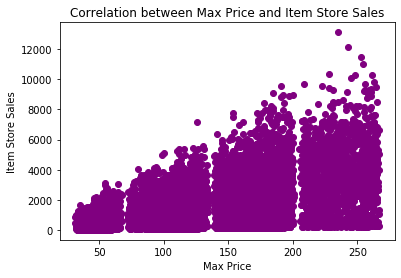

In [7]:
plt.title("Correlation between Max Price and Item Store Sales")
plt.scatter(x = bundas_train['Max_Price'], y = bundas_train['Item_Store_Sales'], c = 'Purple')
plt.xlabel('Max Price')
plt.ylabel('Item Store Sales')

## Data Cleaning

In [8]:
bundas_train.isnull().any()

Item_ID                     False
Weight                       True
FatContent                  False
Visibility                  False
Category                    False
Max_Price                   False
Store_ID                    False
Store_Establishment_Year    False
Store_Size                   True
Store_Location_Type         False
Store_Type                  False
Item_Store_Sales            False
dtype: bool

### Weight and Store Size columns have missing data

In [9]:
bundas_train.isnull().sum()

Item_ID                        0
Weight                      1463
FatContent                     0
Visibility                     0
Category                       0
Max_Price                      0
Store_ID                       0
Store_Establishment_Year       0
Store_Size                  2410
Store_Location_Type            0
Store_Type                     0
Item_Store_Sales               0
dtype: int64

In [10]:
bundas_train[['Store_Size']].mode()

,Store_Size
0,Medium


### Fill null values in Store Size column with 'Unknown'

In [11]:
bundas_train['Store_Size'] = bundas_train.Store_Size.fillna('Unknown')

### Null values in Store Size columns have been dealt with by assigning 'Unknown' to them.

In [12]:
bundas_train[['Store_Size']].isnull().sum()

Store_Size    0
dtype: int64

In [13]:
weight = bundas_train[['Weight']]
float(weight.mean())

12.857645184136183

### Fill null values in Weight column with the mean which is 12.857645

In [14]:
bundas_train[['Weight']] = bundas_train.Weight.fillna(float(weight.mean()))

In [15]:
bundas_train[['Weight']].isnull().sum()

Weight    0
dtype: int64

In [16]:
bundas_train.sample(10)

,Item_ID,Weight,FatContent,Visibility,Category,Max_Price,Store_ID,Store_Establishment_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Sales
7938,FDV50,14.300,Low Fat,0.122571,Dairy,122.3730,OUT046,1997,Small,Tier 1,Supermarket Type1,985.3840
7857,NCW05,20.250,Low Fat,0.148373,Health and Hygiene,108.8938,OUT045,2002,Unknown,Tier 2,Supermarket Type1,3644.5892
6757,FDJ60,19.350,Regular,0.062882,Baking Goods,164.1184,OUT017,2007,Unknown,Tier 2,Supermarket Type1,2807.0128
2184,FDR58,6.675,Low Fat,0.041921,Snack Foods,92.3462,OUT046,1997,Small,Tier 1,Supermarket Type1,2406.2012
7517,FDY01,11.800,Regular,0.170548,Canned,113.8834,OUT049,1999,Medium,Tier 1,Supermarket Type1,1382.2008
4893,NCH29,5.510,Low Fat,0.000000,Health and Hygiene,98.9726,OUT018,2009,Medium,Tier 3,Supermarket Type2,1565.9616
2986,FDE16,8.895,Low Fat,0.026451,Frozen Foods,210.3954,OUT018,2009,Medium,Tier 3,Supermarket Type2,5001.4896
4154,FDF29,15.100,Regular,0.020015,Frozen Foods,128.8310,OUT018,2009,Medium,Tier 3,Supermarket Type2,1817.6340
501,FDE16,8.895,Low Fat,0.026385,Frozen Foods,208.9954,OUT049,1999,Medium,Tier 1,Supermarket Type1,4584.6988
262,FDG28,9.285,Regular,0.049559,Frozen Foods,246.4144,OUT017,2007,Unknown,Tier 2,Supermarket Type1,1225.0720


In [17]:
bundas_train.FatContent.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

### Fat Content column has multiple values that are semantically the same thing, e.g Regular = reg

In [18]:
bundas_train.FatContent.replace('low fat', 'Low Fat', inplace=True)
bundas_train.FatContent.replace('LF', 'Low Fat', inplace=True)
bundas_train.FatContent.replace('reg', 'Regular', inplace=True)

In [19]:
bundas_train.Category.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [20]:
bundas_train.Store_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [21]:
bundas_train.Store_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [22]:
bundas_train[['Category', 'Store_Type']].sample(20)

,Category,Store_Type
5805,Health and Hygiene,Supermarket Type1
8197,Snack Foods,Supermarket Type1
5511,Fruits and Vegetables,Supermarket Type1
1704,Snack Foods,Supermarket Type1
8166,Snack Foods,Supermarket Type1
4966,Health and Hygiene,Supermarket Type1
5599,Snack Foods,Grocery Store
4331,Fruits and Vegetables,Supermarket Type1
290,Soft Drinks,Supermarket Type1
666,Fruits and Vegetables,Supermarket Type1


In [23]:
bundas_train.Visibility.max()

0.328390948

# Data Visualization

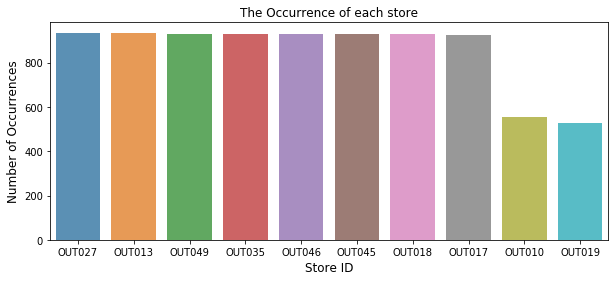

In [24]:
stores = bundas_train['Store_ID'].value_counts()

plt.figure(figsize=(10,4))
sns.barplot(stores.index, stores.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Store ID', fontsize=12)
plt.title('The Occurrence of each store')
plt.show()

In [25]:
store1=bundas_train[bundas_train['Store_Type']=='Supermarket Type1']
store2=bundas_train[bundas_train['Store_Type']=='Supermarket Type2']
store3=bundas_train[bundas_train['Store_Type']=='Grocery Store']
store4=bundas_train[bundas_train['Store_Type']=='Supermarket Type3']

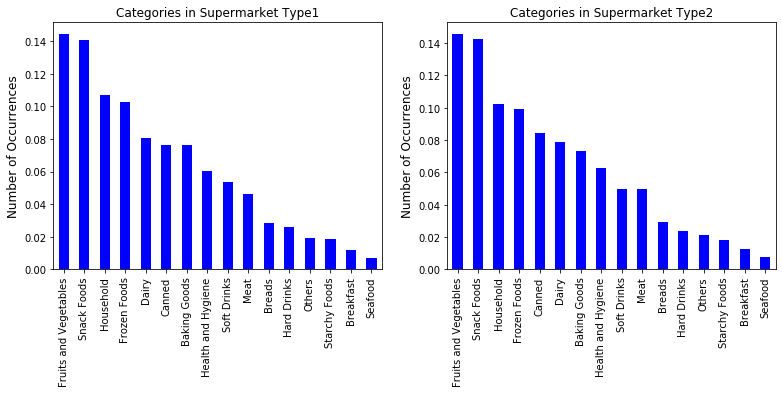

In [26]:
plt.subplot(231)
store1['Category'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Categories in Supermarket Type1', color='b')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.subplot(232)
store2['Category'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Categories in Supermarket Type2', color='b')
plt.ylabel('Number of Occurrences', fontsize=12)


plt.show()

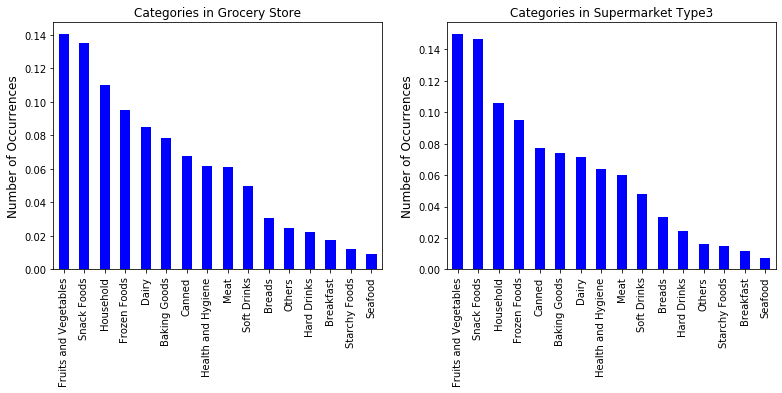

In [27]:
plt.subplot(231)
store3['Category'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Categories in Grocery Store', color='b')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.subplot(232)
store4['Category'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Categories in Supermarket Type3', color='b')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.show()

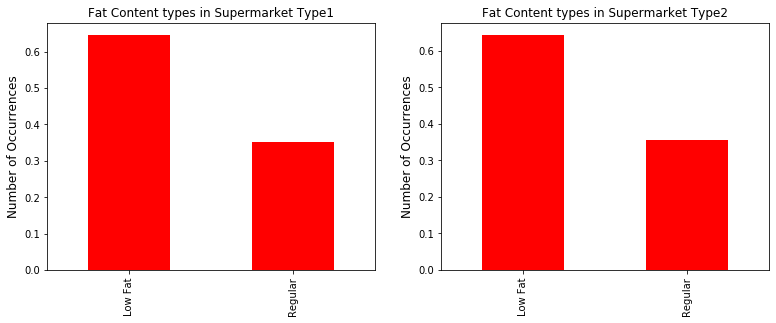

In [28]:
plt.subplot(231)
store1['FatContent'].value_counts(normalize=True).plot.bar(title= 'Fat Content types in Supermarket Type1',figsize=(20,10) ,color = 'r')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.subplot(232)
store2['FatContent'].value_counts(normalize=True).plot.bar(title= 'Fat Content types in Supermarket Type2',figsize=(20,10), color = 'r')
plt.ylabel('Number of Occurrences', fontsize=12)


plt.show()

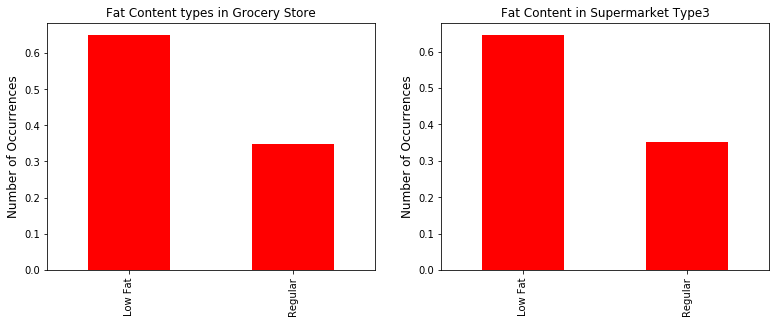

In [29]:
plt.subplot(231)
store3['FatContent'].value_counts(normalize=True).plot.bar(title= 'Fat Content types in Grocery Store', color = 'r')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.subplot(232)
store4['FatContent'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Fat Content in Supermarket Type3', color='r')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

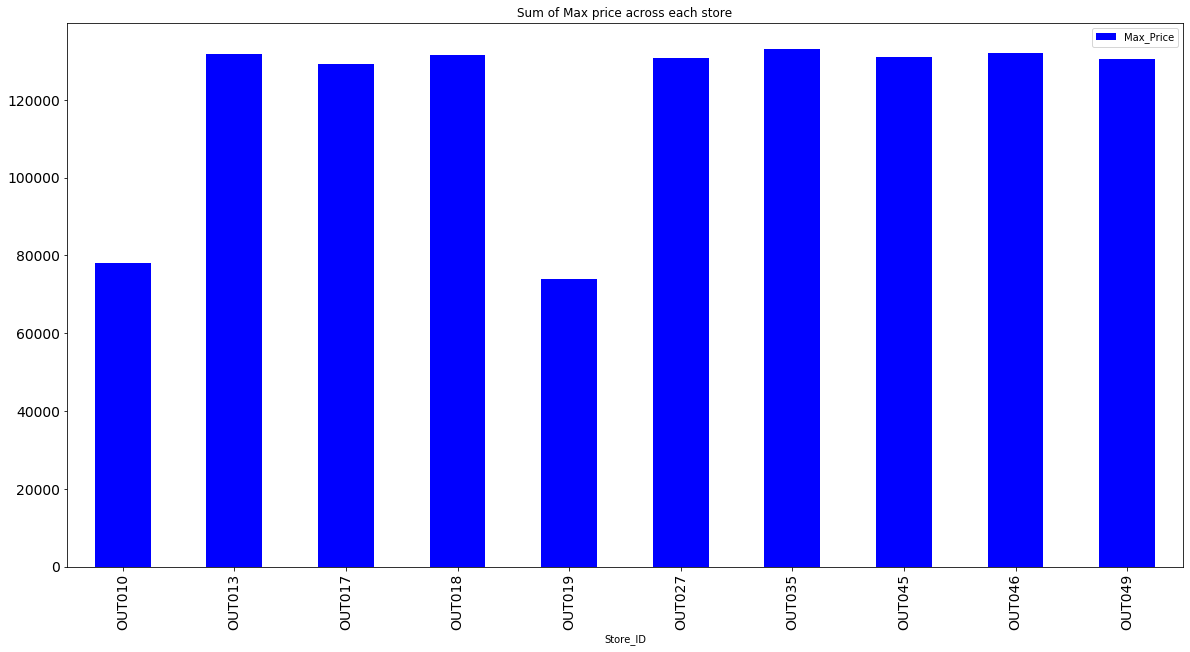

In [30]:
bundas_train.groupby('Store_ID').agg('sum')[['Max_Price']].plot(kind='bar',figsize=(20,10), fontsize='14', stacked=True,color='b',title= 'Sum of Max price across each store')
#plt.xticks(rotation = 90)

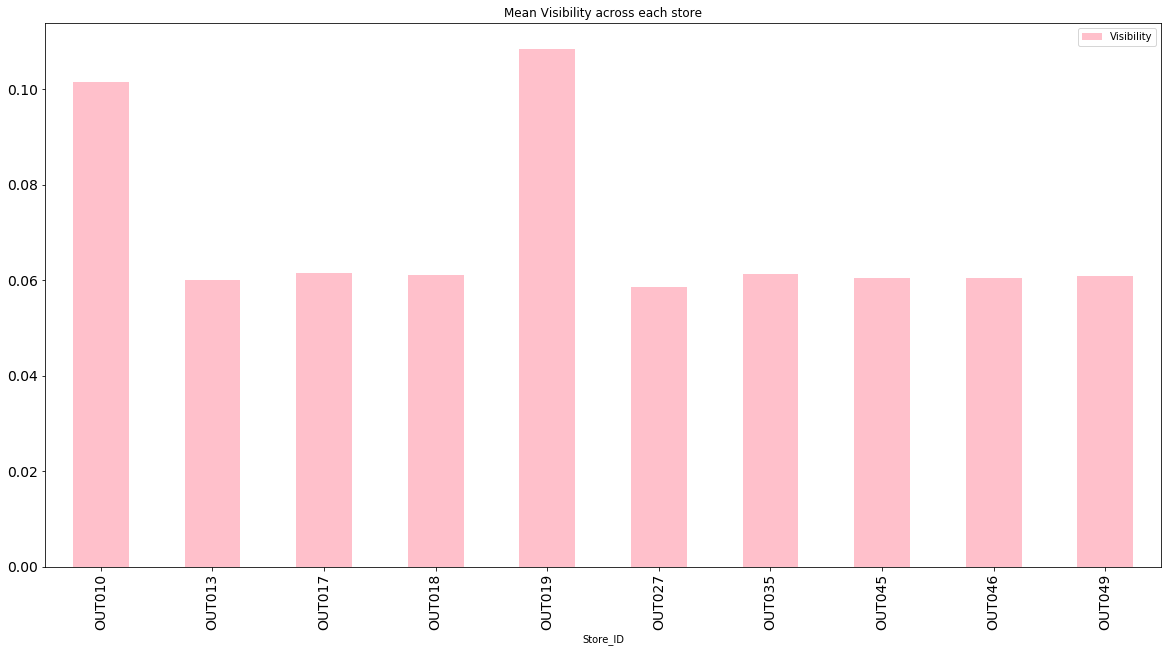

In [31]:
bundas_train.groupby('Store_ID').agg('mean')[['Visibility']].plot(kind='bar',figsize=(20,10), fontsize='14', stacked=True,color='pink',title="Mean Visibility across each store")

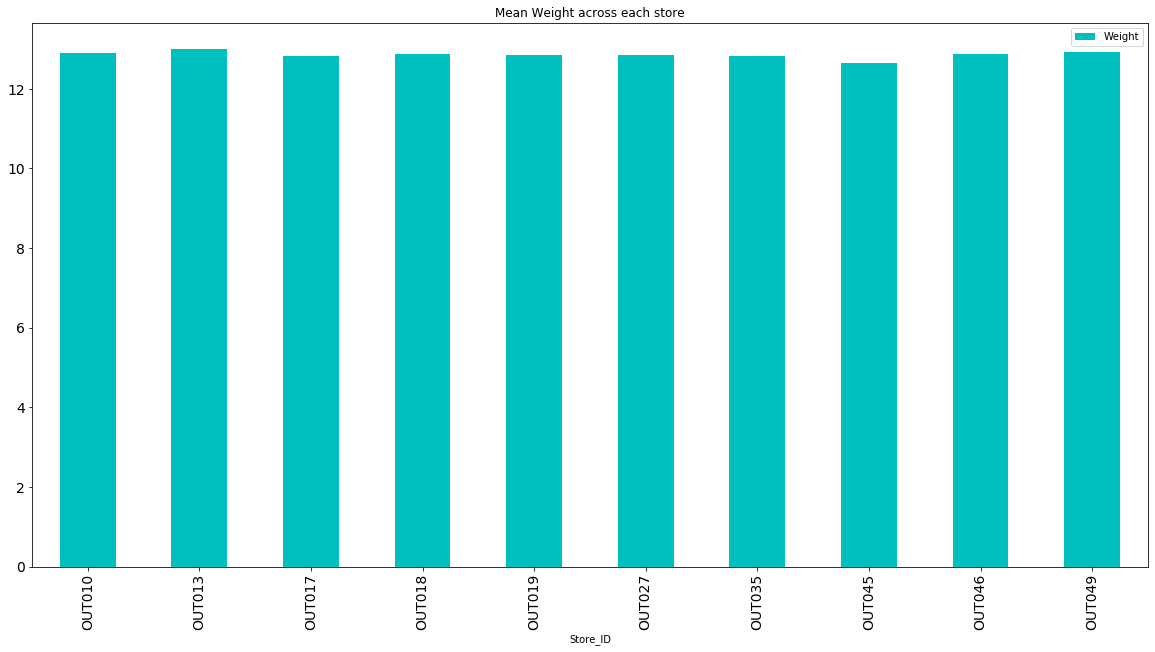

In [32]:
bundas_train.groupby('Store_ID').agg('mean')[['Weight']].plot(kind='bar',figsize=(20,10), fontsize='14', stacked=True,color='c',title="Mean Weight across each store")


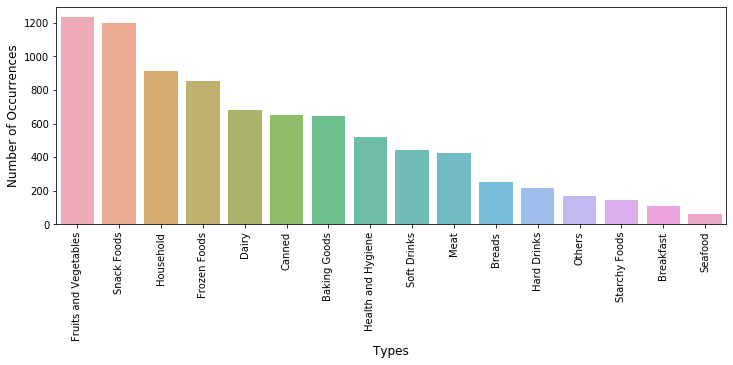

In [33]:
types = bundas_train['Category'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(types.index, types.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.xticks(rotation = 90)
plt.show()

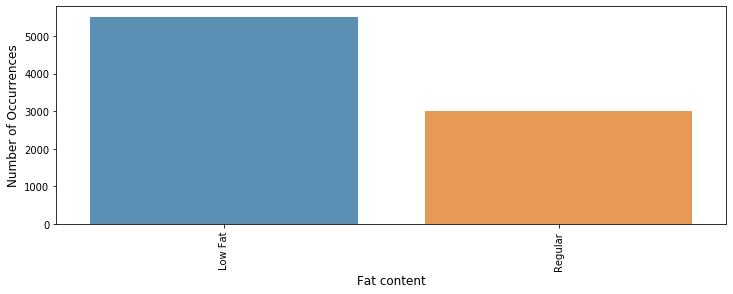

In [34]:
fat = bundas_train['FatContent'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(fat.index, fat.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Fat content', fontsize=12)
plt.xticks(rotation = 90)
plt.show()

In [35]:
data=bundas_train[['Weight','Visibility','Max_Price']]
data.corr()

,Weight,Visibility,Max_Price
Weight,1.000000,-0.012049,0.024756
Visibility,-0.012049,1.000000,-0.001315
Max_Price,0.024756,-0.001315,1.000000


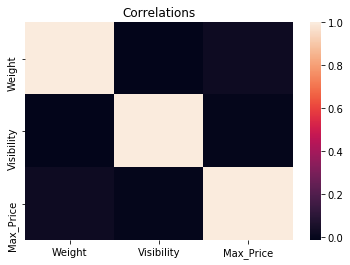

In [36]:
sns.heatmap(data.corr())
plt.title('Correlations')
plt.rcParams['figure.figsize']=(20,8)
plt.show()

## Feature Engineering

### Some columns are meaningless in this analysis so they will be dropped. We will also separate the features from the target variable

In [37]:
X_train = bundas_train.drop(['Item_ID', 'Weight', 'Store_Establishment_Year', 'Store_ID', 'Item_Store_Sales'],axis=1)
y_train = bundas_train['Item_Store_Sales']

### Now we need to encode the categorical variables

In [38]:
# one_hot_encoder = OneHotEncoder(sparse=False)
# encoded_fat_content = one_hot_encoder.fit_transform(X_train[["FatContent"]])
# encoded_category = one_hot_encoder.fit_transform(X_train[["Category"]])
# encoded_store_size = one_hot_encoder.fit_transform(X_train[["Store_Size"]])
# encoded_store_location_type = one_hot_encoder.fit_transform(X_train[["Store_Location_Type"]])
# encoded_store_type = one_hot_encoder.fit_transform(X_train[["Store_Type"]])
X_train_features = pd.get_dummies(X_train)
X_train_features.columns

Index(['Visibility', 'Max_Price', 'FatContent_Low Fat', 'FatContent_Regular',
       'Category_Baking Goods', 'Category_Breads', 'Category_Breakfast',
       'Category_Canned', 'Category_Dairy', 'Category_Frozen Foods',
       'Category_Fruits and Vegetables', 'Category_Hard Drinks',
       'Category_Health and Hygiene', 'Category_Household', 'Category_Meat',
       'Category_Others', 'Category_Seafood', 'Category_Snack Foods',
       'Category_Soft Drinks', 'Category_Starchy Foods', 'Store_Size_High',
       'Store_Size_Medium', 'Store_Size_Small', 'Store_Size_Unknown',
       'Store_Location_Type_Tier 1', 'Store_Location_Type_Tier 2',
       'Store_Location_Type_Tier 3', 'Store_Type_Grocery Store',
       'Store_Type_Supermarket Type1', 'Store_Type_Supermarket Type2',
       'Store_Type_Supermarket Type3'],
      dtype='object')

### Now we need to split the data into training and validation sets. The validation set will be used to evaluate the performance of the model.

In [39]:
X_train_final, X_validation, y_train_final, y_validation = train_test_split(X_train_features, y_train, test_size=0.3)

In [40]:
X_train_final.head()

,Visibility,Max_Price,FatContent_Low Fat,FatContent_Regular,Category_Baking Goods,Category_Breads,Category_Breakfast,Category_Canned,Category_Dairy,Category_Frozen Foods,...,Store_Size_Medium,Store_Size_Small,Store_Size_Unknown,Store_Location_Type_Tier 1,Store_Location_Type_Tier 2,Store_Location_Type_Tier 3,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3
1760,0.000000,75.7012,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
540,0.089084,54.5930,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4336,0.118080,222.6088,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8449,0.019717,191.9188,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
3868,0.021498,230.3326,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [41]:
X_validation.shape

(2557, 31)

## Model

### A multiple linear regression model was the model of choice for this study.

In [42]:
model = linear_model.LinearRegression()
model.fit(X = X_train_final, y = y_train_final)
y_pred = model.predict(X_validation)
r2_score(y_validation, y_pred)

0.5725502539958428

### The coefficient of determination was around 0.55 which means that there is plenty of room for improvement in the model. Perhaps the feature selection needs to be more strict

In [43]:
bundas_test = pd.read_csv('bundas_test.csv')
print(bundas_test.shape)
bundas_test.isnull().any()
bundas_test['Store_Size'] = bundas_test.Store_Size.fillna('Unknown')
bundas_test[['Weight']] = bundas_test.Weight.fillna(float(weight.mean()))
bundas_test.isnull().any()

(5681, 11)


Item_ID                     False
Weight                      False
FatContent                  False
Visibility                  False
Category                    False
Max_Price                   False
Store_ID                    False
Store_Establishment_Year    False
Store_Size                  False
Store_Location_Type         False
Store_Type                  False
dtype: bool

In [44]:
bundas_test['FatContent'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [45]:
bundas_test.FatContent.replace('low fat', 'Low Fat', inplace=True)
bundas_test.FatContent.replace('LF', 'Low Fat', inplace=True)
bundas_test.FatContent.replace('reg', 'Regular', inplace=True)
bundas_test.head()

,Item_ID,Weight,FatContent,Visibility,Category,Max_Price,Store_ID,Store_Establishment_Year,Store_Size,Store_Location_Type,Store_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Unknown,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Unknown,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Unknown,Tier 2,Supermarket Type1
4,FDY38,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### A sample of the sales predictions for the test data are shown below

In [46]:
X_test = bundas_test.drop(['Weight', 'Store_Establishment_Year', 'Store_ID', 'Item_ID'],axis=1)
X_test_features = pd.get_dummies(X_test)
y_test_pred = model.predict(X_test_features)
pd.DataFrame(y_test_pred).sample(20)

,0
2269,2221.697749
3939,91.911563
3374,4323.177206
114,1708.080166
1501,1626.406069
4792,1969.047544
714,1751.166619
432,965.428724
794,2097.547885
2696,2108.071694


### bundas.herokuapp.com - This is the link to a simple web application to make predictions with the above model.